# Scikit-Learn: Generalized Linear Models

Notebook Author: Matthew Kearns

The following methods assume a linear relationship between the input features and the response variable. They are regression methods because they predict a real-valued (continuous) output. Logistic regression can be used for classification when the target variable is categorical.

Notebook Contents:
    
    - Ordinary least squares
    - Ridge regression
    - Lasso
    - Elastic net
    - Least angle regression
    - Logistic regression
    - Stochastic gradient descent
    - Polynomial regression using basis functions

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ordinary least squares

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Creating deviations from y = x
error_train = 5 * np.random.random(50) - 2.5
error_test = 5 * np.random.random(50) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 50)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [51]:
# Fitting a linear regression model to the training data
model = LinearRegression()
model.fit(X_train[:, np.newaxis], y_train)

# Predicting new values from trained model
y_pred = model.predict(X_test[:, np.newaxis])

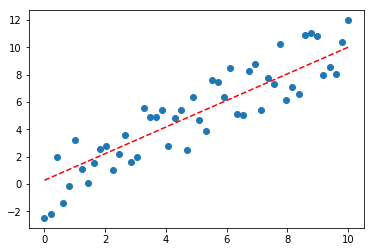

In [53]:
# Plotting the test data and the model
fig = None
fig = plt.scatter(X_test, y_test)
fig = plt.plot(X_test, y_pred, 'r--')
fig = plt.show()

In [57]:
# Displaying the model parameters estimated by the model
print("slope:", model.coef_)
print("y-intercept:", model.intercept_)

slope: [0.97259888]
y-intercept: 0.2762294762255504


### Ridge regression

Ridge regression imposes a penalty on the size of the coefficients determined by minimizing the RSS (residual sum of squares), which tackles the problem of collinearity not handled by OLS above.

In [128]:
from sklearn.linear_model import Ridge

In [129]:
# Creating deviations from y = x
error_train = 5 * np.random.random(50) - 2.5
error_test = 5 * np.random.random(50) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 50)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [130]:
data = pd.DataFrame(X_train, columns=['X_train'])
data['y_train'] = y_train

# repeat rows in X_train to force collinearity
for i in range(0, 50, 5):
    data = data.append(data.iloc[i], ignore_index=True)
    
# ADD ERRORS



In [131]:
# reassign training values
X_train = data['X_train']
y_train = data['y_train']

In [135]:
# Now let's compare the performance of OLS and Ridge
ols_model = LinearRegression()
ridge_model = Ridge(alpha=0.25)

ols_model.fit(X_train[:, np.newaxis], y_train)
ridge_model.fit(X_train[:, np.newaxis], y_train)

y_ols = ols_model.predict(X_test[:, np.newaxis])
y_ridge = ridge_model.predict(X_test[:, np.newaxis])

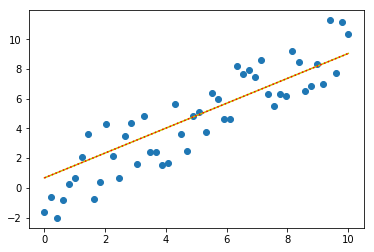

In [136]:
# Visualizing the differences between OLS and Ridge
fig = None
fig = plt.scatter(X_test, y_test)
fig = plt.plot(X_test, y_ols, 'y', label='OLS')
fig = plt.plot(X_test, y_ridge, 'r:', label='Ridge')
fig = plt.show()

In [137]:
# Display model parameter estimates
print("OLS slope:", ols_model.coef_)
print("OLS y-intercept", ols_model.intercept_)
print("Ridge slope:", ridge_model.coef_)
print("Ridge y-intercept", ridge_model.intercept_)

OLS slope: [0.83710936]
OLS y-intercept 0.6700551199821039
Ridge slope: [0.83670784]
Ridge y-intercept 0.6720354028596267
